In [3]:


# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1
Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1


In [5]:


# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
df = pd.read_csv('/Users/zqian/dev_hack/greek_academic.csv',sep='\t',header=(0), low_memory=False)

In [11]:
df.shape

(1695, 5)

In [12]:
df.columns


Index(['First Generation', 'Email click score', 'Email open score',
       'Event Score', 'Academic Engagement Score'],
      dtype='object')

In [15]:
#head
print(df.head(20))

    First Generation  Email click score  Email open score  Event Score  \
0                  0                  2                 4           55   
1                  0                  1                 4          115   
2                  0                  0                 1           55   
3                  0                  0                 1           85   
4                  0                  1                 2          115   
5                  0                  1                 4           55   
6                  0                  2                 4          125   
7                  0                  1                 1           85   
8                  0                  2                 2           55   
9                  0                  1                 3           50   
10                 0                  1                 1           65   
11                 0                  3                 4           90   
12                 0                  

In [16]:

# descriptions
print(df.describe())

       First Generation  Email click score  Email open score  Event Score  \
count            1695.0        1695.000000       1695.000000  1695.000000   
mean                0.0           1.037758          2.900885    90.327434   
std                 0.0           0.776569          1.150265    30.560904   
min                 0.0           0.000000          0.000000    15.000000   
25%                 0.0           1.000000          2.000000    65.000000   
50%                 0.0           1.000000          3.000000    95.000000   
75%                 0.0           1.000000          4.000000   110.000000   
max                 0.0           4.000000          6.000000   175.000000   

       Academic Engagement Score  
count                1695.000000  
mean                   87.177581  
std                     9.690900  
min                     8.000000  
25%                    84.000000  
50%                    89.000000  
75%                    93.000000  
max                   196.

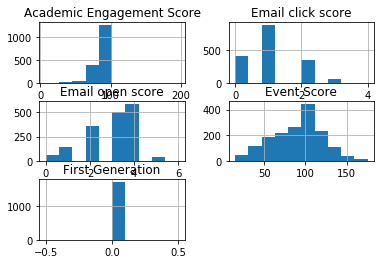

In [17]:
df.hist()
plt.show()

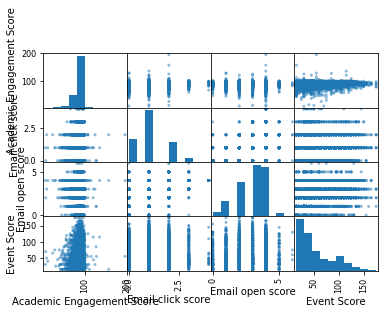

In [107]:
scatter_matrix(df)
plt.show()

In [108]:
array = df.values
X = array[:,1:3]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [109]:
Y_validation.size

949

In [121]:
df.columns

Index(['Academic Engagement Score', 'Email click score', 'Email open score',
       'Event Score'],
      dtype='object')

In [18]:
## ordinary least squared model
df.rename(columns={'Academic Engagement Score': 'y', 'Email click score': 'x1', 'Email open score':'x2', 'Event Score':'x3', "First Generation":'x4'}, inplace=True)

import statsmodels.formula.api as smf

lm = smf.ols(formula='y ~ x1 + x2 + x3 + x4', data=df).fit()
print(lm.params)

Intercept    82.401925
x1            0.606756
x2           -0.025994
x3            0.046734
x4            0.000000
dtype: float64


In [126]:

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.325
Date:                Fri, 02 Mar 2018   Prob (F-statistic):           3.82e-06
Time:                        00:47:35   Log-Likelihood:                -17297.
No. Observations:                4741   AIC:                         3.460e+04
Df Residuals:                    4737   BIC:                         3.463e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.2032      0.430    200.566      0.0

In [19]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  Intercept    82.401925
x1            0.606756
x2           -0.025994
x3            0.046734
x4            0.000000
dtype: float64
R2:  0.0260538654628
